In [2]:
import pandas as pd
import boto3
from sagemaker import get_execution_role

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [36]:
conn = boto3.client('s3')
bucket = 'awsbucket-un-datathon-uph23'
content = conn.list_objects(Bucket=bucket)["Contents"]
# content

In [37]:
for data in content:
    print(data['Key'])

Test AG Iris Dataset Logistic Regression.ipynb
datasets/
datasets/HTI_2021_FIES_v01_EN_M_v01_A_OCS.RData
datasets/HTI_2021_FIES_v01_EN_M_v01_A_OCS.csv
datasets/HTI_2021_FIES_v01_EN_M_v01_A_OCS.dta
datasets/HTI_2021_FIES_v01_EN_M_v01_A_OCS.sav
datasets/HTI_2022_FIES_v01_EN_M_v01_A_OCS.RData
datasets/HTI_2022_FIES_v01_EN_M_v01_A_OCS.csv
datasets/HTI_2022_FIES_v01_EN_M_v01_A_OCS.dta
datasets/HTI_2022_FIES_v01_EN_M_v01_A_OCS.sav
datasets/MMR_2020_FIES_v01_EN_M_v01_A_OCS.RData
datasets/MMR_2020_FIES_v01_EN_M_v01_A_OCS.csv
datasets/MMR_2020_FIES_v01_EN_M_v01_A_OCS.dta
datasets/MMR_2020_FIES_v01_EN_M_v01_A_OCS.sav
datasets/MMR_2021_FIES_v01_EN_M_v01_A_OCS.RData
datasets/MMR_2021_FIES_v01_EN_M_v01_A_OCS.csv
datasets/MMR_2021_FIES_v01_EN_M_v01_A_OCS.dta
datasets/MMR_2021_FIES_v01_EN_M_v01_A_OCS.sav
datasets/MMR_2022_FIES_v01_EN_M_v01_A_OCS.RData
datasets/MMR_2022_FIES_v01_EN_M_v01_A_OCS.csv
datasets/MMR_2022_FIES_v01_EN_M_v01_A_OCS.dta
datasets/MMR_2022_FIES_v01_EN_M_v01_A_OCS.sav
datasets/agri

In [96]:
dataset_hti_22 = 'datasets/HTI_2022_FIES_v01_EN_M_v01_A_OCS.csv'

In [98]:
#!pip install pyreadstat
#df = pd.read_spss(f"s3://{bucket}/{dataset}")
df_hti_22 = pd.read_csv(f"s3://{bucket}/{dataset_hti}")
df_hti_22.columns, df_hti_22.head(5)

(Index(['Unnamed: 0', 'Random_ID', 'WORRIED', 'HEALTHY', 'FEWFOOD', 'SKIPPED',
        'ATELESS', 'RUNOUT', 'HUNGRY', 'WHLDAY', 'wt', 'year', 'N_adults',
        'N_child', 'Raw_score', 'Raw_score_par', 'Raw_score_par_error',
        'Prob_Mod_Sev', 'Prob_sev', 'Age', 'Education', 'Area', 'Gender',
        'Income'],
       dtype='object'),
    Unnamed: 0  Random_ID  WORRIED  HEALTHY  FEWFOOD  SKIPPED  ATELESS  RUNOUT  \
 0           0        NaN      1.0      1.0      0.0      1.0      1.0     1.0   
 1           1        NaN      1.0      1.0      1.0      1.0      1.0     1.0   
 2           2        NaN      1.0      1.0      0.0      1.0      1.0     0.0   
 3           3        NaN      1.0      1.0      1.0      1.0      1.0     1.0   
 4           4        NaN      1.0      1.0      0.0      1.0      1.0     1.0   
 
    HUNGRY  WHLDAY  ...  Raw_score  Raw_score_par Raw_score_par_error  \
 0     1.0     1.0  ...        7.0       2.385018            1.098216   
 1     1.0     1.

In [99]:
slice_1_hti_22 = df.iloc[:,2:10]
slice_1_hti_22.describe()

,WORRIED,HEALTHY,FEWFOOD,SKIPPED,ATELESS,RUNOUT,HUNGRY,WHLDAY
count,1984.000000,1966.000000,1977.000000,1996.000000,1983.000000,1990.000000,1995.000000,1987.000000
mean,0.889617,0.841302,0.511887,0.764028,0.905194,0.765829,0.803008,0.338198
std,0.313446,0.365487,0.499985,0.424711,0.293020,0.423586,0.397826,0.473215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
slice_1_hti_22.isna().sum()

WORRIED    21
HEALTHY    39
FEWFOOD    28
SKIPPED     9
ATELESS    22
RUNOUT     15
HUNGRY     10
WHLDAY     18
dtype: int64

In [101]:
slice_1_hti_dropped_22 = slice_1_hti_22.dropna()

In [102]:
from sklearn.decomposition import PCA
pca_hti_22 = PCA(n_components=8)
pca_hti_22.fit(slice_1_hti_dropped_22)

PCA(n_components=8)

In [103]:
print(pca_hti_22.explained_variance_ratio_)

[0.38044319 0.15076746 0.14000323 0.09138317 0.08169912 0.07188175
 0.0473794  0.03644269]


In [83]:
pd.set_option('display.max_rows', 50)
slice_1_counts = slice_1.value_counts()
display(slice_1_counts)

WORRIED  HEALTHY  FEWFOOD  SKIPPED  ATELESS  RUNOUT  HUNGRY  WHLDAY
1.0      1.0      1.0      1.0      1.0      1.0     1.0     1.0       353
                                                             0.0       299
                  0.0      1.0      1.0      1.0     1.0     0.0       233
                                                             1.0       143
                           0.0      1.0      1.0     1.0     0.0        50
                                                                      ... 
0.0      0.0      0.0      1.0      0.0      1.0     1.0     0.0         1
1.0      1.0      1.0      0.0      1.0      1.0     0.0     1.0         1
                           1.0      0.0      0.0     0.0     0.0         1
                                             1.0     0.0     1.0         1
         0.0      0.0      0.0      0.0      0.0     0.0     1.0         1
Length: 145, dtype: int64

In [105]:
dataset_mmr_22 = 'datasets/MMR_2022_FIES_v01_EN_M_v01_A_OCS.csv'
df_mmr_22 = pd.read_csv(f"s3://{bucket}/{dataset_mmr_22}")
df_mmr_22.columns, df_mmr_22.head(5)

(Index(['Unnamed: 0', 'Random_ID', 'WORRIED', 'HEALTHY', 'FEWFOOD', 'SKIPPED',
        'ATELESS', 'RUNOUT', 'HUNGRY', 'WHLDAY', 'wt', 'year', 'N_adults',
        'N_child', 'Raw_score', 'Raw_score_par', 'Raw_score_par_error',
        'Prob_Mod_Sev', 'Prob_sev', 'Age', 'Education', 'Area', 'Gender',
        'Income'],
       dtype='object'),
    Unnamed: 0    Random_ID  WORRIED  HEALTHY  FEWFOOD  SKIPPED  ATELESS  \
 0           0  141960652.0      0.0        0        0      0.0        0   
 1           1  146185956.0      1.0        1        0      0.0        1   
 2           2  132668344.0      0.0        0        0      0.0        0   
 3           3  128143145.0      1.0        1        1      1.0        1   
 4           4  193829422.0      0.0        0        0      0.0        0   
 
    RUNOUT  HUNGRY  WHLDAY  ...  Raw_score  Raw_score_par Raw_score_par_error  \
 0       0       0       0  ...        0.0      -2.329770            0.975047   
 1       0       1       0  ...      

In [117]:
slice_1_hti_22.describe(), slice_1_mmr_22.describe()

(           WORRIED      HEALTHY      FEWFOOD      SKIPPED      ATELESS  \
 count  1984.000000  1966.000000  1977.000000  1996.000000  1983.000000   
 mean      0.889617     0.841302     0.511887     0.764028     0.905194   
 std       0.313446     0.365487     0.499985     0.424711     0.293020   
 min       0.000000     0.000000     0.000000     0.000000     0.000000   
 25%       1.000000     1.000000     0.000000     1.000000     1.000000   
 50%       1.000000     1.000000     1.000000     1.000000     1.000000   
 75%       1.000000     1.000000     1.000000     1.000000     1.000000   
 max       1.000000     1.000000     1.000000     1.000000     1.000000   
 
             RUNOUT       HUNGRY       WHLDAY  
 count  1990.000000  1995.000000  1987.000000  
 mean      0.765829     0.803008     0.338198  
 std       0.423586     0.397826     0.473215  
 min       0.000000     0.000000     0.000000  
 25%       1.000000     1.000000     0.000000  
 50%       1.000000     1.000000   

In [114]:
slice_1_mmr_22 = df_mmr_22.iloc[:, 2:10]
slice_1_mmr_22_dropped = slice_1_mmr_22.dropna(axis=0)
pca_mmr_22 = PCA(n_components=8)
pca_mmr_22.fit(slice_1_mmr_22_dropped)
pca_mmr_22.explained_variance_ratio_

array([0.54296214, 0.11623636, 0.08428086, 0.07593251, 0.0588944 ,
       0.04881827, 0.04042493, 0.03245052])

In [116]:
pca_hti_22.explained_variance_ratio_, pca_mmr_22.explained_variance_ratio_

(array([0.38044319, 0.15076746, 0.14000323, 0.09138317, 0.08169912,
        0.07188175, 0.0473794 , 0.03644269]),
 array([0.54296214, 0.11623636, 0.08428086, 0.07593251, 0.0588944 ,
        0.04881827, 0.04042493, 0.03245052]))

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# VIF dataframe 
vif_data_mmr_22 = pd.DataFrame() 
vif_data_mmr_22["feature"] = slice_1_mmr_22_dropped.columns
vif_data_hti_22 = pd.DataFrame() 
vif_data_hti_22["feature"] = slice_1_hti_dropped_22.columns

# calculating VIF for each feature 
vif_data_mmr_22["VIF"] = [variance_inflation_factor(slice_1_mmr_22_dropped.values, i) 
                          for i in range(len(slice_1_mmr_22_dropped.columns))] 
vif_data_hti_22["VIF"] = [variance_inflation_factor(slice_1_hti_dropped_22.values, i) 
                          for i in range(len(slice_1_hti_dropped_22.columns))] 
  
print(vif_data_mmr_22)
print(vif_data_hti_22)

   feature       VIF
0  WORRIED  2.316070
1  HEALTHY  2.823797
2  FEWFOOD  3.358680
3  SKIPPED  2.128885
4  ATELESS  2.695831
5   RUNOUT  2.099767
6   HUNGRY  2.672579
7   WHLDAY  1.477924
   feature        VIF
0  WORRIED  12.879286
1  HEALTHY   9.281901
2  FEWFOOD   2.365970
3  SKIPPED   5.708118
4  ATELESS  12.463764
5   RUNOUT   6.277772
6   HUNGRY   7.435351
7   WHLDAY   1.755406


In [134]:
#idx = range(0, (len(slice_1_mmr_22_dropped.columns)))
#variance_inflation_factor(slice_1_hti_dropped_22.values, idx)

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


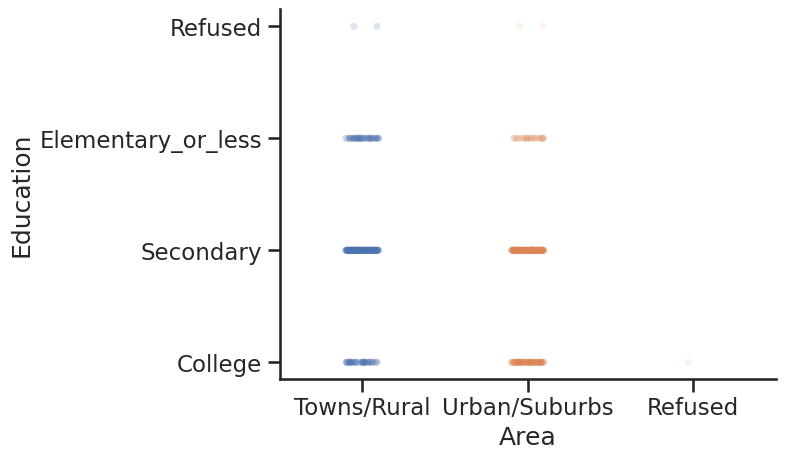

In [158]:
# df_mmr_22
import matplotlib.pyplot as plt

#plt.scatter(df_mmr_22['Area'], df_mmr_22['Education'])
#plt.show()

import seaborn as sns

sns.set(style='ticks', context='talk')

# sns.swarmplot('Area', 'Education', data=df_mmr_22)
sns.stripplot('Area', 'Education', data=df_mmr_22, jitter=True, alpha=0.1)
sns.despine()
